# 13.2 DBSCAN算法

## 13.2.1 DBSCAN算法的基本原理

## 13.2.2 DBSCAN算法的代码实现

**1. 读取数据**

In [1]:
import pandas as pd
data = pd.read_excel('演示数据.xlsx')
data.head()

,x,y
0,10.44,5.74
1,11.55,6.16
2,11.36,5.10
3,10.62,6.12
4,11.20,5.39


**2. 数据可视化**

In [2]:
%matplotlib inline

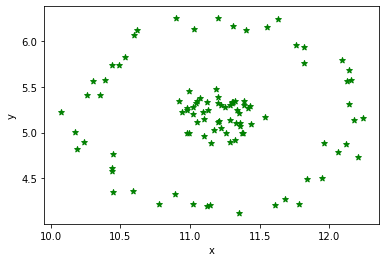

In [3]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c="green", marker='*')  # 以绿色星星样式绘制散点图
plt.xlabel('x')  # 添加x轴名称
plt.ylabel('y')  # 添加y轴名称
plt.show()

**3. 数据建模**

In [4]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN()
dbs.fit(data)
label_dbs = dbs.labels_

In [5]:
# DBSCAN?  # 如果想查看DBSCAN的官方说明，可以在其DBSCAN后面加上?进行查看

**4. 查看聚类结果**

In [6]:
print(label_dbs)

[0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0]


**5. 用散点图展示DBSCAN算法的聚类结果**

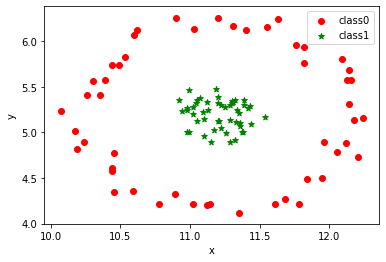

In [7]:
plt.scatter(data[label_dbs == 0].iloc[:, 0], data[label_dbs == 0].iloc[:, 1], c="red", marker='o', label='class0')  # 以红色圆圈样式绘制散点图并加上标签  
plt.scatter(data[label_dbs == 1].iloc[:, 0], data[label_dbs == 1].iloc[:, 1], c="green", marker='*', label='class1')  # 以绿色星星样式绘制散点图并加上标签 
plt.xlabel('x')  # 添加x轴名称
plt.ylabel('y')  # 添加y轴名称
plt.legend()  # 设置图例

## 13.2.3 KMeans VS DBSCAN

In [8]:
from sklearn.cluster import KMeans
KMs = KMeans(n_clusters=2)
KMs.fit(data)
label_kms = KMs.labels_

In [9]:
# KMs # 这样可以查看模型参数，这里没有设置random_state参数，所以可能每次跑出来的结果略有不同（因为每次起始点选的地方不同）

In [10]:
print(label_kms)

[1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1
 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0]


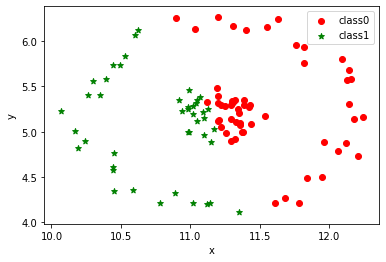

In [11]:
plt.scatter(data[label_kms == 0].iloc[:, 0], data[label_kms == 0].iloc[:, 1], c="red", marker='o', label='class0')  # 以红色圆圈样式绘制散点图并加上标签  
plt.scatter(data[label_kms == 1].iloc[:, 0], data[label_kms == 1].iloc[:, 1], c="green", marker='*', label='class1')  # 以绿色星星样式绘制散点图并加上标签 
plt.xlabel('x')  # 添加x轴名称
plt.ylabel('y')  # 添加y轴名称
plt.legend()  # 设置图例

可以看到，对于形状类似同心圆的数据，KMeans算法聚类效果较差，只能机械地将数据分为左右两部分，而无法以外圆内圆的方式进行区分。